#1).....Extracting feature with VGG16 Network......

In [ ]:
!unzip /content/roundlog.zip

In [ ]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet121
from keras.applications.efficientnet import EfficientNetB7
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import preprocess_input
from keras.applications.resnet import preprocess_input
from keras.applications.densenet import preprocess_input
from keras.applications.efficientnet import preprocess_input
from keras.models import Model

# extract features from each photo in the directory
def extract_features(directory):
	# load the model

	model = VGG16()
  #model = VGG19()
	#model = ResNet50()
	#model = DenseNet121()
	#model = EfficientNetB7()
 
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features

# extract features from all images
directory = 'roundlog'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('tree_features.pkl', 'wb'))

# 2).....Import The Pkl File,Check features..........

In [ ]:
import pickle
pickle_in = open("tree_features.pkl","rb")
features = pickle.load(pickle_in)

In [ ]:
len(features)

26

In [ ]:
features['jam (1)'][0,10:100]

In [ ]:
features

In [ ]:
label = {}

# 3)......... Class Create for Tree Classification.....

In [ ]:
def get_class(ipt):
    class_id = 0
    if 'Arjun' in ipt : 
        class_id = 1
    elif 'Ashoke' in ipt : 
        class_id = 2
    elif 'jack fruit' in ipt : 
        class_id = 3
    elif 'jam' in ipt : 
        class_id = 4
    elif  'Litchi' in ipt : 
        class_id = 5
    elif 'Mango' in ipt : 
        class_id = 6
    elif  'Mehgoni' in ipt : 
        class_id = 7
    elif  'Neem' in ipt : 
        class_id = 8
    elif  'pahari gamar' in ipt : 
        class_id = 9
    elif  'Raj koroi' in ipt : 
        class_id = 10
    elif  'Segun' in ipt : 
        class_id = 11
    elif  'Tamarind' in ipt : 
        class_id = 12
    elif  'Ucliptus' in ipt : 
        class_id = 13
    else :
     print("I don't know")

    return class_id

In [ ]:
for key, value in features.items() :
    label[key] = get_class(key)

I don't know
I don't know


In [ ]:
get_class('Tamarind(3)')

In [ ]:
label['Tamarind(3)']

# 4).....Create Numpy Array, Train Test Splite......

In [ ]:
x = []
y = []

In [ ]:
for key, value in features.items() :
    x.append(features[key][0])
    y.append(label[key])

In [ ]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [ ]:
x[1].shape

(1000,)

In [ ]:
print (type(x))
print (type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
import numpy as np
x_train_data=np.array(x)
y_train_data=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=800, shuffle=True)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=800, shuffle=True)

#5)...Check Train Test Accuracy With KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)

clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))

#6)Clasiification report (precision, recall,f1-score)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#class_names = get_class
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

#7)Confusion matrix

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#8)...Check Train Test Accuracy With Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=40)

clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))

Accuracy: 0.0%


#9)...Check Train Test Accuracy With SVM,Roc Curve, PRC

In [ ]:
#train accuracy for Svm
from sklearn import svm
clf = svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_train)
print("Accuracy: {}%".format(clf.score(x_train, y_train) * 100 ))

Accuracy: 32.78350515463917%


In [ ]:
#test Accuracy for Svm
from sklearn import svm
clf = svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)

#clf = svm.SVC(kernel='poly')

clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))

Accuracy: 17.03056768558952%


In [ ]:
!pip install scikit-plot

<module 'scikitplot' from '/usr/local/lib/python3.7/dist-packages/scikitplot/__init__.py'>

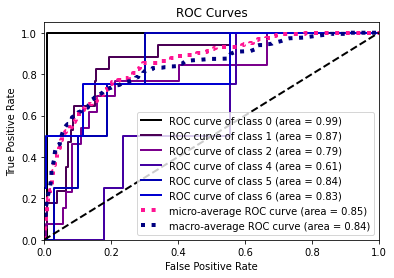

In [ ]:
# roc Curve For Svm
import scikitplot as plt
from sklearn import svm
clf = svm.SVC(probability=True)
clf = clf.fit(x_train, y_train)
y_probas = clf.predict_proba(x_test)
plt.metrics.plot_roc(y_test, y_probas, title='ROC Curves', plot_micro=True, plot_macro=True, classes_to_plot=[0,1,2,4,5,6], ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')
plt

<module 'scikitplot' from '/usr/local/lib/python3.7/dist-packages/scikitplot/__init__.py'>

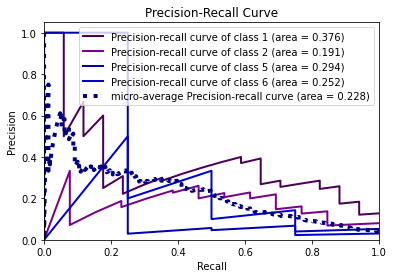

In [ ]:
#Precision-Recall Curve for svm
import scikitplot as skplt
clf = svm.SVC(probability=True)
clf = clf.fit(x_train, y_train)
y_probas = clf.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas, title='Precision-Recall Curve', plot_micro=True, classes_to_plot=[1,2,5,6], ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')

plt

#9)...Check Train Test Accuracy With Logistic Regression,Roc Curve, PRC

In [ ]:
#train accuracy for Logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_train)
print("Accuracy: {}%".format(clf.score(x_train, y_train) * 100 ))

Accuracy: 29.896907216494846%


In [ ]:
#test accuracy for Logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))


Accuracy: 17.903930131004365%


<module 'scikitplot' from '/usr/local/lib/python3.7/dist-packages/scikitplot/__init__.py'>

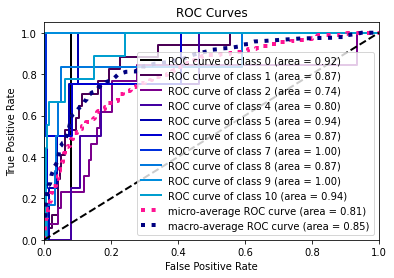

In [ ]:
# roc Curve For Logistic Regresion
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
clfrf=LogisticRegression()
clfrf = clfrf.fit(x_train, y_train)
y_probas = clfrf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, title='ROC Curves', plot_micro=True, plot_macro=True, classes_to_plot=[0,1,2,4,5,6], ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')
plt

<module 'scikitplot' from '/usr/local/lib/python3.7/dist-packages/scikitplot/__init__.py'>

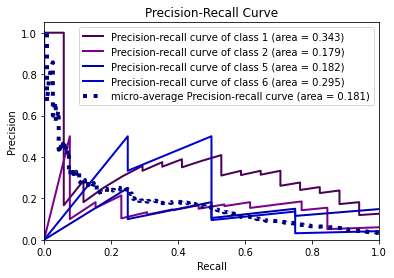

In [ ]:
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
clfknnn = LogisticRegression()
clfknnn = clfknnn.fit(x_train, y_train)
y_probas = clfknnn.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas, title='Precision-Recall Curve', plot_micro=True, 
classes_to_plot=[1,2,5,6], ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')

plt


#10)......For Increase the accuracy K=5 fold cross Validation.....

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

kf.get_n_splits(x)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, x, y, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % ((scores.mean())*100, scores.std() * 2))